## Plotting the data
Now it's time to have fun plotting the data. We need to define which axes we want to view the data along. For example, sometimes we may want to view along (1,0,0), (0,1,0) and (0,0,1), while other times, it may be useful to view along a different pair of directions, such as (1,1,0),(1,-1,0) and (0,0,1). The choice of primary axes is made using the proj dictionary, as seen below.

To make a plot, we need to cut the .sqw file in some way. We use the `cut_sqw` command for this. It takes as input the `.sqw` file, the projection axes, and four arrays: one for each primary axis, the fourth being energy. For each of the arrays, there are two options. If the user provides two values, e.g. `[-0.1,0.1]` the counts between these two values are summed, and the axis is not viewed. If the user provides three values, e.g. `[-2,0.05,1]`, the data is binned along this axis in bins starting at the first value (`-2`), with a step size of the middle value (`0.05`), ending at the last value (`1`). 

The type of cut therefore depends on how many directions the user sums over. Some examples are given below.

Details can be found in the Horace documentation: https://pace-neutrons.github.io/Horace/v4.0.0/manual/Cutting_data_of_interest_from_SQW_files_and_objects.html#cut 

In [1]:
from pace_neutrons import Matlab
m = Matlab()

Interface opened
All features have moved to hor_config
> In herbert_config (line 3)Warning: Cannot find test path, possible failed setup
!==================================================================!
!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!
All features have moved to hor_config
!==================================================================!
!                           Horace 4.0.0                           !
!------------------------------------------------------------------!
!   Visualisation of multi-dimensional neutron spectroscopy data   !
!                                                                  !
!           R.A. Ewings, A. Buts, M.D. Le, J van Duijn,            !
!                  I. Bustinduy, and T.G. Perring                 

*** Step 1 of 1; Read data for   107965 pixels -- processing data... ----->  retained     47529 pixels


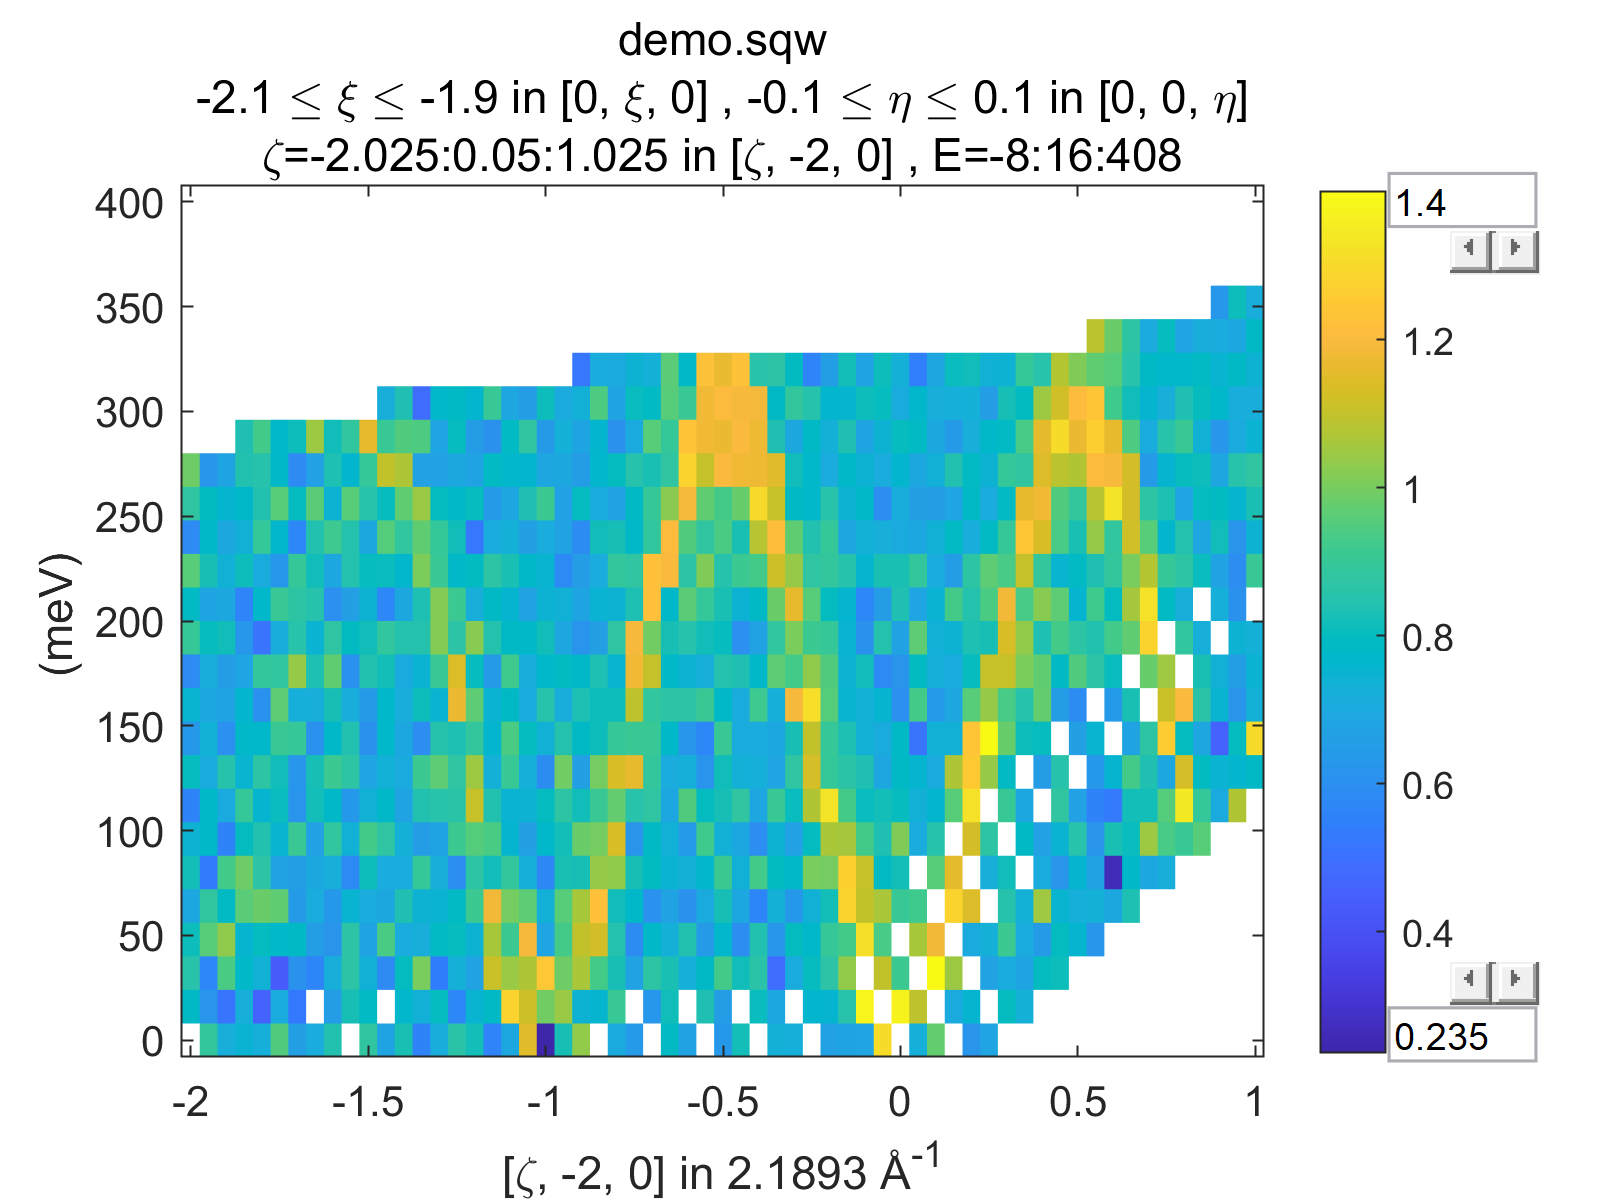

In [2]:

sqw_file = 'demo.sqw'
proj = {
    'u': [1, 0, 0],
    'v': [0, 1, 0],
    'type': 'rrr'
}

%matlab_plot_mode inline inline
%matlab_fig -w 1600 -h 1200 
# 2D slice
slice2d = m.cut_sqw(sqw_file, proj, [-2, 0.05, 1], [-2-0.1, -2+0.1], [-0.1, 0.1], [0, 16, 400])
m.plot(slice2d)


# A note on figures
There are two ways to make Matlab figures in a Jupyter Notebook. Details can be found in the documentation: https://github.com/pace-neutrons/pace-python/blob/main/docs/IPythonMagics_commands.md.

The first methods is inline as shown above. As illustrated, the size of the figure can be varied as illustrated above using the `%matlab_fig -w 1600 -h 1200 ` command, where -w and -h give the width and height of the figure, respectively. The figure is simply a screenshot of the Matlab figure, and can therefore not be edited. Unfortunately, it is difficult to control the size of the text relative to the plot, and some adjustment of the figure size may be needed.

The second method is windowed figures, which opens a new window with a Matlab figure, which can then be edited at will. The command is `%matlab_plot_mode windowed`. We shall illustrate it in the following cell, then mostly stick to the inline figures.

In [6]:

%matlab_plot_mode windowed
m.plot(slice2d)
m.keep_figure() # Keeps the figure open instead of overwriting it with the next plot


*** Step 1 of 1; Read data for    28783 pixels -- processing data... ----->  retained      8373 pixels


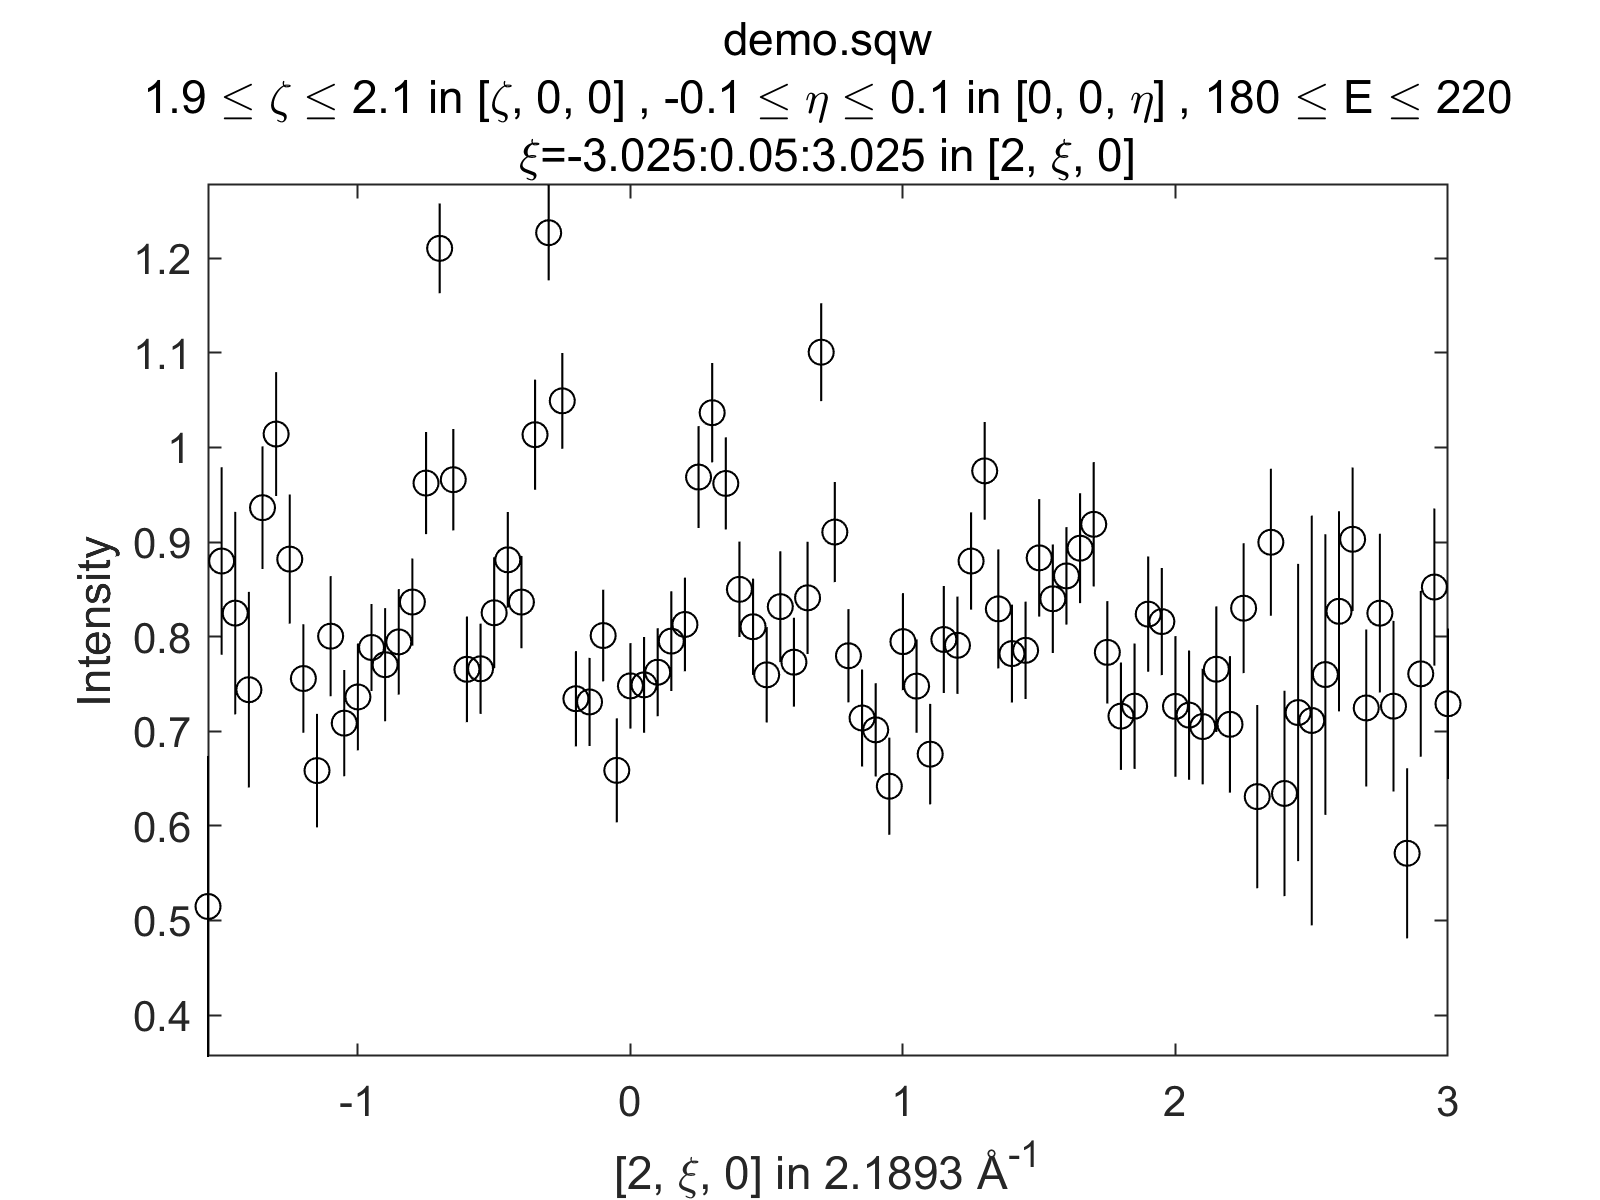

In [7]:
%matlab_plot_mode inline inline
%matlab_fig -w 1600 -h 1200 
# 1D cut
cut1d = m.cut_sqw(sqw_file, proj, [1.9, 2.1], [-3, 0.05, 3], [-0.1, 0.1], [180, 220])
a=m.plot(cut1d)


You can also plot in 3D, and make 2D slices interactively as you please. For this, only windowed mode works. Try it out, and try also to make other 1D and 2D cuts. It should look like this:

<img src='_images/sliceomatic.jpg' width='800px'></img>


You can select which surfaces to plot by clicking on the sliders next to each axis. In this example, three surfaces are shown, indicated by the green arrows. You can also grab the arrows and move through the surface.

In [ ]:
%matlab_plot_mode windowed
cc3 = m.cut_sqw(sqw_file, proj, [-2, 0.05, 2], [-2, 0.05, 2], [-0.1, 0.1], [0, 16, 400])
m.plot(cc3)
m.keep_figure()


Finally, let us look at "spaghetti" plots, tracing out a path in reciprocal space. We here arbitrarily choose the path [0,0,0] &rarr; [-2, -2, 0] &rarr; [1, -2, 0] &rarr; [-2, -2, 0]. The method takes a bunch of optional arguments, in the format `'argument'`, `value`. For example, `'qwidth',0.5` gives the integration range in perpendicular directions in Å-1. 

*** Step 1 of 1; Read data for   213447 pixels -- processing data... ----->  retained     29488 pixels
*** Step 1 of 1; Read data for   444798 pixels -- processing data... ----->  retained     62342 pixels
*** Step 1 of 1; Read data for   444798 pixels -- processing data... ----->  retained     62342 pixels


*** spaghetti_plot: rlp found to lie in the plane perpendicular to (2.11236e-15 8.04322e-16 13.1356)



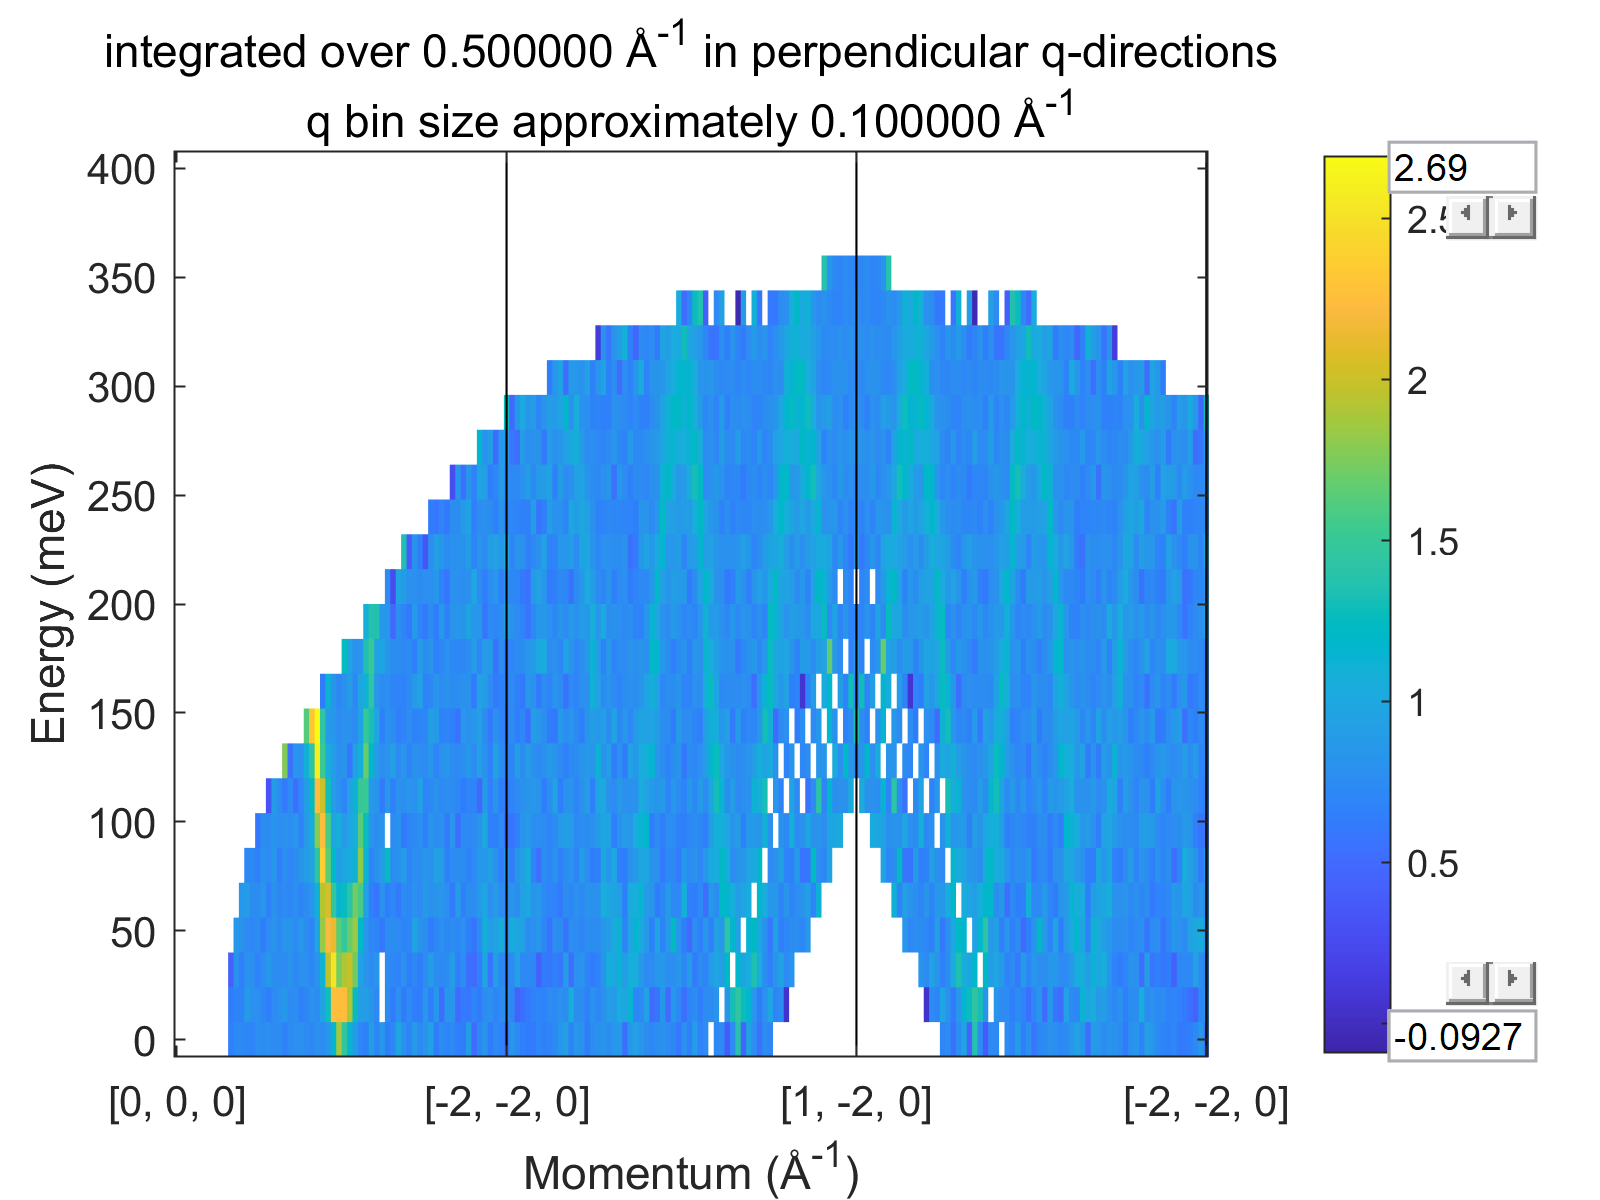

In [11]:

%matlab_fig -w 1600 -h 1200 
wsp = m.spaghetti_plot([[0,0, 0], [-2, -2, 0], [1, -2, 0], [-2, -2, 0]],sqw_file,'qwidth',0.5,'qbin',0.1,'ebin',[0,16,400]) #,'labels',{'\\Gamma','R','M'})

# m.plot(wsp)



# A note on help 
Since pace_python is a Python wrapper of a Matlab library, some things are not quite as smooth as pure Matlab or pure Python. For example, it can be difficult to figure out what the optional arguments are to functions. To this end, we provide a helper to extract the help part of the Horace functions. As an example, we show how to find more information about the `spaghetti_plot` method used above. To see the full output, click "view as a scrollable element" at the bottom of the cell

In [12]:
import pace_helper
pace_helper.pace_helper('spaghetti_plot')

Help for `spaghetti_plot` (from horace_core/spaghetti_plot.m):

Plots the data in an sqw file or object along a path in reciprocal space

>> spaghetti_plot(rlp,data_source)
>> spaghetti_plot(wdisp)

>> spaghetti_plot(...,'labels',{'G','X',...})            % customised labels
>> spaghetti_plot(...,'smooth',1)                        % smooth data with this width
>> spaghetti_plot(...,'smooth_shape','hat')              % smooth data with this shape
>> spaghetti_plot(...,'qbin',qb)                         % specify q bin size in 1/Ang
>> spaghetti_plot(...,'qwidth',qi)                       % specify q integration width in 1/Ang
>> spaghetti_plot(...,'qwidth', [0.1; 0.3; ...])         % square q integration for each segment
>> spaghetti_plot(...,'qwidth', [0.1 0.1; 0.3 0.1; ...]) % q integration for each segment
>> spaghetti_plot(...,'ebin',[elo estp ehi])             % specify energy bin in meV
>> spaghetti_plot(...,'logscale')                        % plots intensity in log10 scale
>> sp